<a href="https://colab.research.google.com/github/Yahyung25/yahyung-syawia/blob/master/CNN_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jul 11 01:06:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!unzip "/content/drive/My Drive/Image processing.zip"

Archive:  /content/drive/My Drive/Image processing.zip
   creating: Image processing/
   creating: Image processing/dataset/
   creating: Image processing/dataset/test/
   creating: Image processing/dataset/test/Cb/
  inflating: Image processing/dataset/test/Cb/cb_01.jpg  
  inflating: Image processing/dataset/test/Cb/cb_02.jpg  
  inflating: Image processing/dataset/test/Cb/cb_03.jpg  
  inflating: Image processing/dataset/test/Cb/cb_04.jpg  
  inflating: Image processing/dataset/test/Cb/cb_05.jpg  
  inflating: Image processing/dataset/test/Cb/cb_06.jpg  
  inflating: Image processing/dataset/test/Cb/cb_07.jpg  
  inflating: Image processing/dataset/test/Cb/cb_08.jpg  
  inflating: Image processing/dataset/test/Cb/cb_09.jpg  
  inflating: Image processing/dataset/test/Cb/cb_10.jpg  
  inflating: Image processing/dataset/test/Cb/cb_100.jpg  
  inflating: Image processing/dataset/test/Cb/cb_101.jpg  
  inflating: Image processing/dataset/test/Cb/cb_102.JPG  
  inflating: Image processi

In [3]:
!rsync -a --progress "/content/drive/My Drive/Image processing.zip" "/content"

sending incremental file list
Image processing.zip
    521,035,588 100%  192.58MB/s    0:00:02 (xfr#1, to-chk=0/1)


# **Import** **Library**

In [5]:
%tensorflow_version 1.x
import tensorflow as tf

import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Activations
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils 

from keras.utils.vis_utils import model_to_dot
from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Input, Dropout, Conv2D, MaxPooling2D, MaxPool2D
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plot
import matplotlib.gridspec as gridspec

import numpy as np
import cv2

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM

from IPython.display import SVG

import os

In [6]:
!pip install livelossplot
!pip install efficientnet

# **Dateset Label & Image Array**

In [84]:
img_size=64 
#semakin kecil gambar proses training akan semakin cepat
#semakin kecil juga nilai validation accuracy yang didapat
#Begitu juga dengan semakin besar gambar maka proses training akan menjadi lama dan nilai validation accuracy juga akan meningkat

def get_images(directory):
    Images = []
    Labels = []
    label = 0

    for labels in os.listdir(directory):
        if labels == 'Cu':
            label = 0
        elif labels == 'Cb':
            label = 1
        #elif labels == 'label(klasifikasi)': 
            #label = 2
        #.....
        #jika kalian ingin menambahkan label klasifikasi tinggal tambahkan variable nya misal 2 untuk "label(klasifikasi) dataset"
        #Begitu juga seterusnya

        for image_file in os.listdir(directory+labels):
            image = cv2.imread(directory+labels+r'/'+image_file) #digunakan untuk membaca gambar pada direktory dataset
            image = cv2.resize(image,(img_size, img_size,)) #digunakan untuk men-resize ukuran gambar sesuai variable inputan
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            #image = cv2.imread(directory+labels+r'/'+image_file, cv2.IMREAD_GRAYSCALE)
            Images.append(image) #digunakan untuk memasukan list gambar
            Labels.append(label) #digunakan untuk memasukan list label
    return shuffle(Images,Labels,random_state=817328462)

def get_classlabel(class_code):
    labels = {0:'Cu', 1:'Cb'} #Seperti proses label(klasifikasi) kalian juga dapat menambahkan label(klasifikasi)
    #misal "labels = {0:'cb',1:'cu',2:'label(klasikasi)dataset,3:....'}"

    return labels[class_code]

In [85]:
Images, Labels = get_images("/content/Image processing/dataset/train/") 
Images = np.array(Images) #.reshape(-1, 64, 64, 1)
Labels = np.array(Labels) 
print("Jumlah dan ukuran image", Images.shape) 
print("Labels", Labels.shape)

Jumlah dan ukuran image (497, 64, 64, 3)
Labels (497,)


# **Model CNN**

In [86]:
#Untuk memahami secara detail setiap perintah ini kalian dapat mengunjungi website "https://keras.io/api/layers/"
model = Models.Sequential() #proses awal pembuatan layer CNN dengan keras Sequential

model.add(Layers.Dense(512,input_shape=(img_size,img_size,3)))

model.add(Layers.Conv2D(32,(5,5), padding="same", activation="relu"))
model.add(Layers.Dropout(0.2))
model.add(Layers.MaxPooling2D(pool_size=(2,2)))
model.add(Layers.Conv2D(64,(5,5), padding="valid", activation="relu",))
model.add(Layers.MaxPooling2D(pool_size=(2,2)))

model.add(Layers.Flatten())
model.add(Layers.Dropout(0.3))
model.add(Layers.Dense(2, activation="softmax")) #kenapa "2" karena jumlah label/klasifikasi gambar ada 2 Class, pastikan kalian menyesuaikan angka ini dengan jumlah klasifikasi kalian.



In [87]:
model.summary() #Print Model (layer CNN) yang telah kalian buat.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64, 64, 512)       2048      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 32)        409632    
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12544)            

In [88]:
model.compile(optimizer=Optimizer.Adam(lr=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#model.compile berfungsi untuk mengkonfigurasi akhir Model kalian
#Untuk mengganti optimizer tinggal rubah ke Optimizer.RMSProp, Optimizer.SGD atau yang lainnya
#kenapa harus diganti optimizer nya karena optimizer ini akan berpengaruh dan menghasilkan nilai validation accuracy yang berbeda.

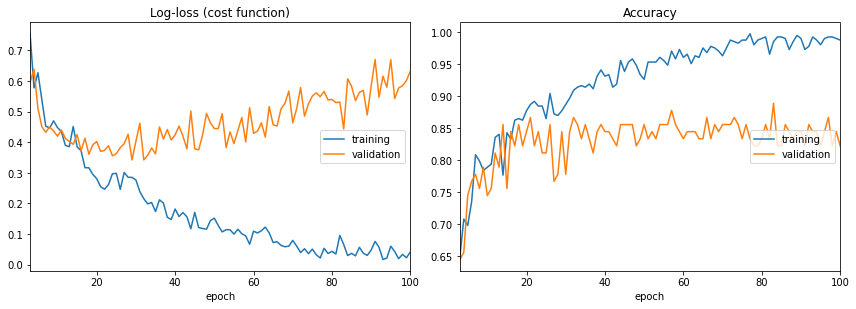

Log-loss (cost function):
training   (min:    0.017, max:    5.820, cur:    0.042)
validation (min:    0.342, max:    0.720, cur:    0.633)

Accuracy:
training   (min:    0.617, max:    0.998, cur:    0.988)
validation (min:    0.600, max:    0.889, cur:    0.822)
407/407 [==============================] - 1s 2ms/sample - loss: 0.0418 - acc: 0.9877 - val_loss: 0.6325 - val_acc: 0.8222


In [89]:
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn
from keras.callbacks import CSVLogger
MODEL_SUMMARY_FILE = "model_summary.txt"
TRAINING_LOGS_FILE = "training_logs.csv"
with open(MODEL_SUMMARY_FILE,'w') as fh:
    model.summary(print_fn=lambda line:fh.write(line+"\n"))

trained= model.fit(Images, Labels, epochs=100, validation_split=0.18, batch_size=32,
                   callbacks=[PlotLossesCallback(),
                   CSVLogger(TRAINING_LOGS_FILE,
                             append=False,
                             separator=";")]) 

In [91]:
test_images, test_labels = get_images("/content/Image processing/dataset/test/")


test_images = np.array(test_images)#.reshape(-1, 64, 64, 1)
test_labels = np.array(test_labels)

model.evaluate(test_images,test_labels, verbose=1)

259/259 [==============================] - 0s 405us/sample - loss: 0.3821 - acc: 0.8880


[0.38213470797180327, 0.8880309]

# **Prediksi Gambar**

In [92]:
#Proses Ini untuk mengambil gambar yang kalian ingin prediksi
pred_images, no_labels = get_images("/content/Image processing/dataset/test/")
pred_images = np.array(pred_images)
pred_images.shape #.reshape(-1, 64, 64, 1)

(259, 64, 64, 3)

IndexError: ignored

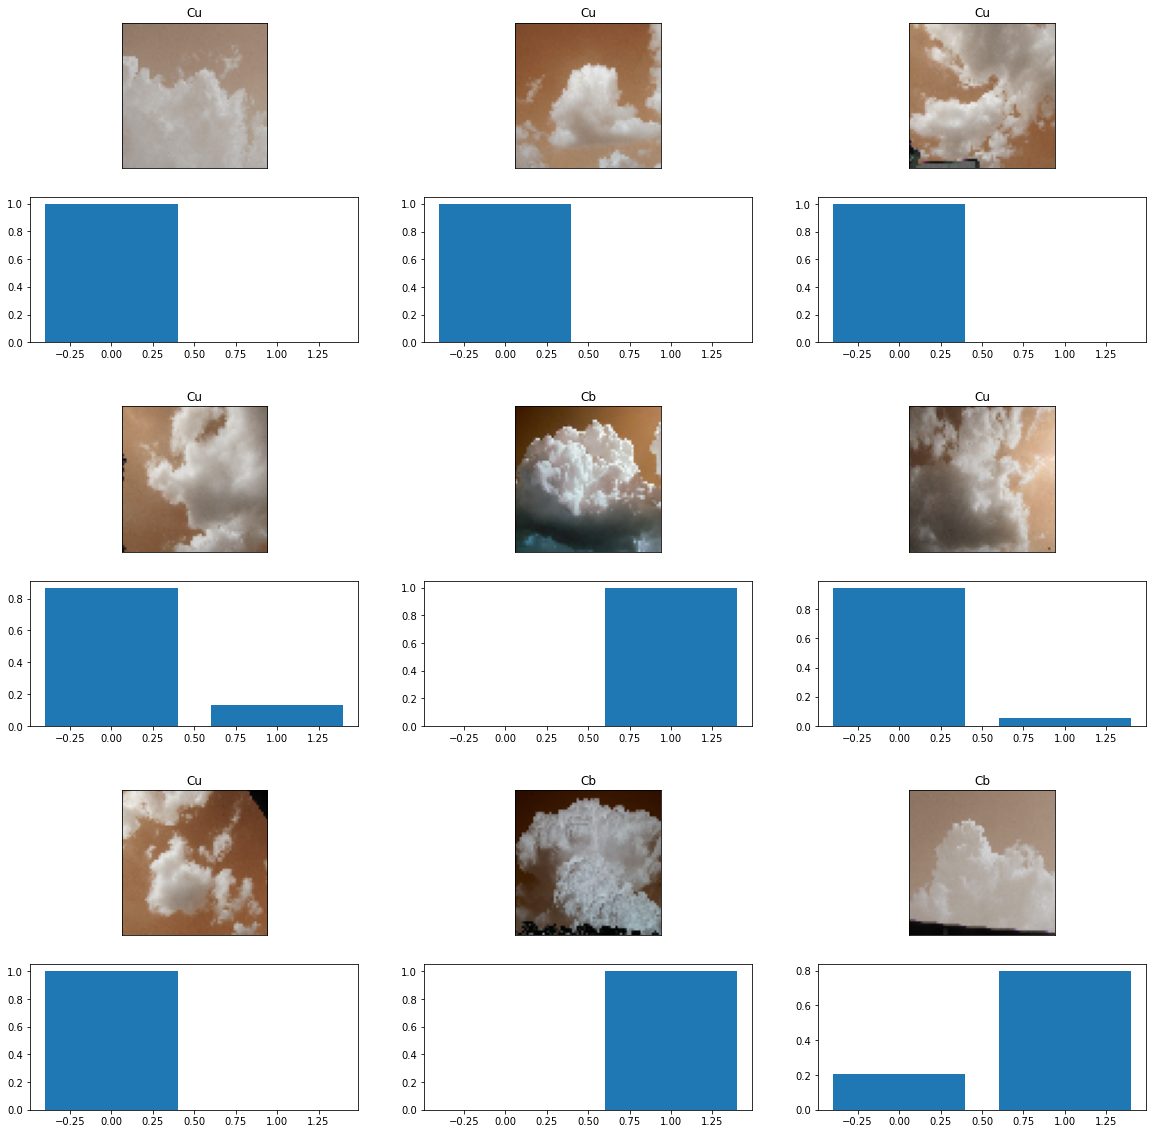

In [93]:
from random import randint
fig = plot.figure(figsize=(20,20))
outer = gridspec.GridSpec(3,3, wspace=0.2, hspace=0.2)

for i in range(17):
  inner = gridspec.GridSpecFromSubplotSpec(2,1, subplot_spec=outer[i], wspace=0.2,hspace=0.2)
  rnd_number = randint(0,len(pred_images))
  pred_image = np.array([pred_images[rnd_number]])
  pred_class = get_classlabel(model.predict_classes(pred_image)[0])
  pred_prob = model.predict(pred_image).reshape(2) #Pastikan reshape(angka), angka sesuai jumlah label(klasifikasi) sesuai dengan jumlah klasifikasi pada Part 3
  for j in range(2):
      if(j%2) == 0:
        ax = plot.Subplot(fig, inner[j])
        ax.imshow(pred_image[0])
        ax.set_title(pred_class)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
      else:
        ax = plot.Subplot(fig, inner[j])
        ax.bar([0,1],pred_prob) 
        #Dan pastikan array [0,1] sesuai jumlah label(klasifikasi) kalian misal kalian punya 3 label maka [0,1,2] sesuai dengan jumlah klasifikasi pada Part 3
        fig.add_subplot(ax)

fig.show()